<a href="https://colab.research.google.com/github/kimsihyun0129/ArtificialIntelligence/blob/main/%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%2C%EC%84%A0%ED%98%95%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀

## 정규 방정식

### 데이터 생성

In [1]:
import numpy as np

np.random.seed(42)  # 시드를 고정해서 코드를 실행할 때마다 항상 동일한 랜덤값이 나오도록 설정
m = 100 # 샘플 개수
X = 2* np.random.rand(m, 1) # 열 벡터
y = 4 + 3*X + np.random.randn(m, 1) # 열 벡터 y=4+3X+노이즈

### 정규 방정식을 사용해 세타 계산

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # 각 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T@X_b)@X_b.T@y
theta_best

array([[4.21509616],
       [2.77011339]])

### 계산된 세타 값으로 예측

In [6]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # 각 샘플에 x0 = 1을 추가
y_predict = X_new_b@theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

### sklearn에서 제공하는 LinearRegression

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # 특성 가중치, 편향

(array([4.21509616]), array([[2.77011339]]))

In [11]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## 배치 경사 하강법(Batch Gradient Descent)

In [13]:
eta = 0.1 # 학습률
n_epochs = 1000 # 학습 반복 횟수
m = len(X_b)  # 샘플 개수

np.random.seed(42)
theta = np.random.randn(2, 1) # 모델 파라미터를 랜덤하게 초기화

for epoch in range(n_epochs):
    gradients = 2/m * X_b.T@(X_b@theta - y)
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

## 확률적 경사 하강법

In [16]:
n_epochs = 50 # 학습 반복 횟수
t0, t1 = 5, 50  # 학습 스케줄 하이퍼 파라미터

def learning_schedule(t):
  return t0 / (t+t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # 랜덤 초기화

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T @ (xi @theta - yi) # SGD의 경우 m으로 나누지 않음.
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients
theta

array([[4.21076011],
       [2.74856079]])

### sklearn 모델에서 제공하는 SGDRegressor

In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(
    max_iter=1000,  # 최대 반복 횟수
    tol=1e-5,   # 조기 종료 기준
    penalty=None, # 정규화(페널티) 사용 안 함(기본은 'l2')
    eta0=0.01, # 학습률
    n_iter_no_change=100, # 개선 없을 경우 100번 이후 학습 종료
    random_state=42
)

sgd_reg.fit(X, y.ravel()) # fit()이 1D 타깃을 기대하기 때문에 y.ravel()로 씀

sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

# 다항 회귀

In [36]:
np.random.seed(42)
m = 100 # 샘플 개수
X = 6 * np.random.rand(m, 1) - 3  # X는 -3부터 3사이의 랜덤한 값들
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

## 사이킷런의 PolynomialFeatures를 사용해 훈련 데이터 변환

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)  # 2차 다항식까지 변환함. 상수항인 1을 포함하지 않음.
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [22]:
X_poly[0] # [x, x^2]의 형태

array([-0.75275929,  0.56664654])

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ # 절편과 특성의 계수 출력

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

## 규제가 있는 선형 모델

### 릿지 회귀(ridge regression)

In [37]:
# 정규 방정식을 사용한 릿지 회귀(안드레 루이 숄레스키)
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky") # alpha는 정규화 강도임. 클수록 강한 규제.
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.82497007])

In [42]:
# 확률적 경사 하강법
sgd_reg = SGDRegressor(
    max_iter=1000,  # 최대 반복 횟수
    tol=1e-5,   # 조기 종료 기준
    penalty="l2", # 정규화(페널티) 사용
    eta0=0.01, # 학습률
    n_iter_no_change=100, # 개선 없을 경우 100번 이후 학습 종료
    random_state=42
)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.83345157])

### 라쏘 회귀(Lasso : least absolute shrinkage and selection operator)

In [43]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)  # alpha는 정규화 강도. Ridge와 달리 조금만 키워도 일부 계수가 0이 될 수 있음.
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

## 로지스틱 회귀

### 학습 데이터 로드

In [45]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True) # 데이터 프레임 형식으로 반환
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [46]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [47]:
iris.target.head(3)

,target
0,0
1,0
2,0


In [48]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 로지스틱 회귀 모델 학습

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values  # 꽃 잎 너비만 선택
y = iris.target_names[iris.target] == 'virginica' # virginica인지 여부를 True/False로 표시. 이진 분류.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # 학습용 데이터와 테스트용 데이터 분리

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

### 추정 확률과 결정 경계

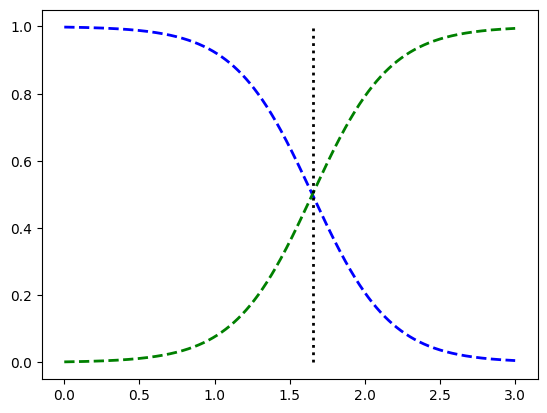

In [53]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # 0부터 3까지 1000개의 점을 만들고, 각 값을 1열짜리 벡터로 바꿈.
y_proba = log_reg.predict_proba(X_new)  # X_new 값에 대해 0번 클래스일 확률과 1번 클래스일 확률 반환
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0] # 클래스1(Virginica)일 확률이 0.5 이상인 첫 지점을 찾아 결정 경계로 설정.

import matplotlib.pyplot as plt

plt.plot(X_new, y_proba[:,0], "b--", linewidth=2, label="Iris-Virginica가 아닐 확률")
plt.plot(X_new, y_proba[:,1], "g--", linewidth=2, label="Iris-Virginica일 확률")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="결정 경계")
plt.show()

## 소프트맥스 회귀(softmax regression)

In [55]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)
softmax_reg.predict([[5,2]])

array([2])

In [56]:
softmax_reg.predict_proba([[5,2]]).round(2)

array([[0.  , 0.04, 0.96]])